## Linear Models for Regression

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from myprml.myfeatures import GaussianFeatures, PolynomialFeatures,SigmoidalFeatures
from myprml.linear import (
    BayesianRegressor,
    EmpricalBayesRegressor,
    LinearRegressor,
    RidgeRegressor
)


In [3]:
def create_toy_data(func,sample_size,std,domain=[0,1]):
    x=np.linspace(domain[0],domain[1],sample_size)
    np.random.shuffle(x)
    t=func(x)+np.random.normal(scale=std,size=x.shape)
    return x,t


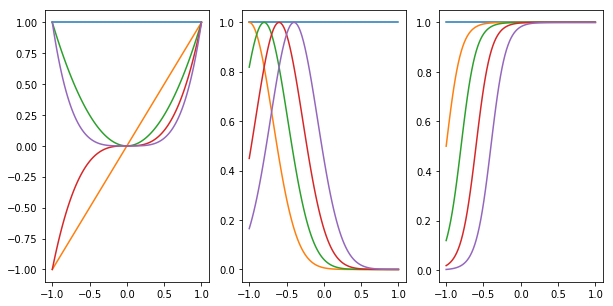

In [4]:
x = np.linspace(-1, 1, 100)
X_polynomial = PolynomialFeatures(11).transform(x[:, None])
X_gaussian = GaussianFeatures(np.linspace(-1, 1, 11), 0.1).transform(x)
X_sigmoidal = SigmoidalFeatures(np.linspace(-1, 1, 11), 10).transform(x)


plt.figure(figsize=(10, 5))
for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1)
    for j in range(5):
        plt.plot(x, X[:, j])
plt.show()

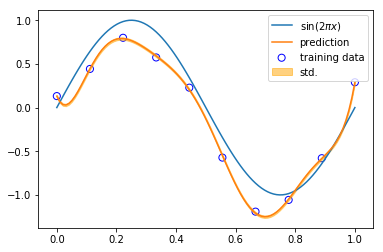

In [5]:
def sinusoidal(x):
    return np.sin(2*np.pi*x)

x_train,y_train=create_toy_data(sinusoidal,10,0.25)

x_test=np.linspace(0,1,100)
y_test=sinusoidal(x_test)

#feature=PolynomialFeatures(np.linspace(0,1,8),0.1)
feature=GaussianFeatures(np.linspace(0,1,8),0.1)
#feature=SigmoidalFeatures(np.linspace(0,1,8),10)

X_train=feature.transform(x_train)
X_test=feature.transform(x_test)

model=LinearRegressor()
model.fit(X_train,y_train)
y,ystd=model.predict(X_test,return_std=True)

plt.scatter(x_train,y_train,facecolor="none",edgecolors="b", s=50, label="training data")
plt.plot(x_test,y_test,label="$\sin(2\pi x)$")
plt.plot(x_test,y,label="prediction")
plt.fill_between(
    x_test,y-ystd,y+ystd,
    color="orange",alpha=0.5,label="std."
)
plt.legend()
plt.show()

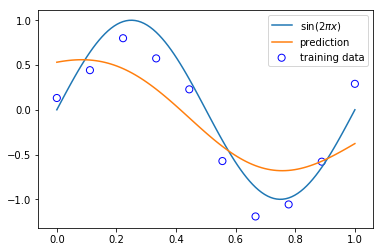

In [6]:
model = RidgeRegressor(alpha=0.3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolors="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.legend()
plt.show()

100.0


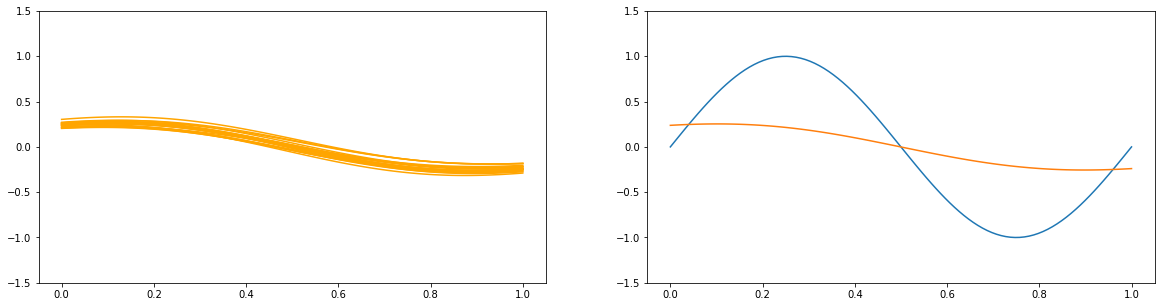

1.0


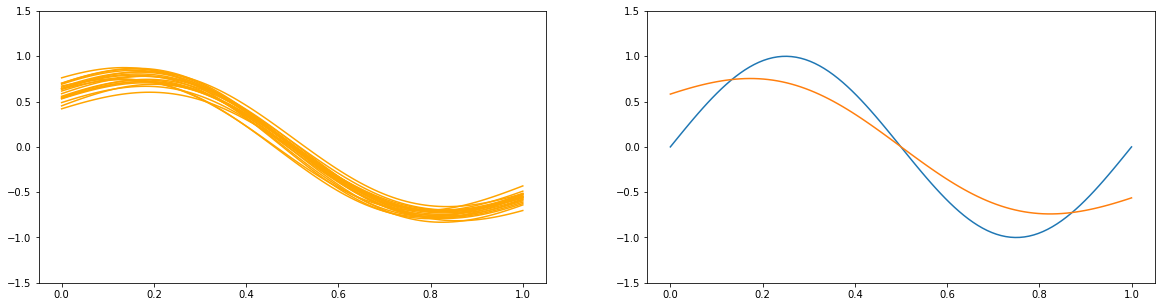

1e-09


In [7]:
feature=GaussianFeatures(np.linspace(0,1,24),0.1)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

for a in [1e2,1.0,1e-9]:
    y_list=[]
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    for i in range(100):
        x_train,y_train=create_toy_data(sinusoidal,25,0.2)
        X_train=feature.transform(x_train)
        X_test=feature.transform(x_test)
        model=BayesianRegressor(alpha=a,beta=1.)
        model.fit(X_train,y_train)
        y=model.predict(X_test)
        y_list.append(y)
        if i<20:
            plt.plot(x_test,y,c="orange")
    print(a)
    plt.ylim(-1.5,1.5)
    plt.subplot(1,2,2)
    plt.plot(x_test,y_test)
    plt.plot(x_test,np.asarray(y_list).mean(axis=0))
    plt.ylim(-1.5,1.5)
    plt.show()
        
    

(100, 100)
(100, 100)
(100, 100, 2)


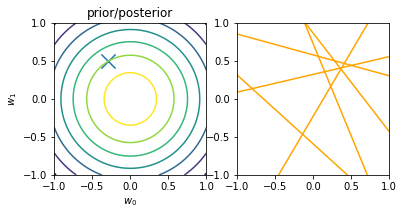

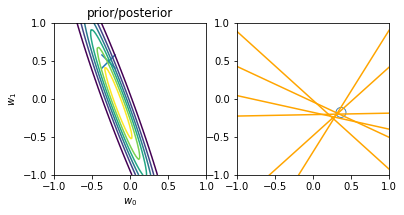

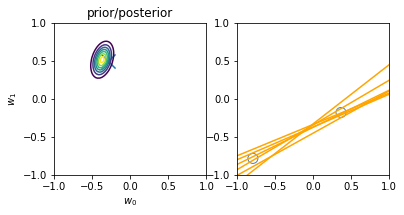

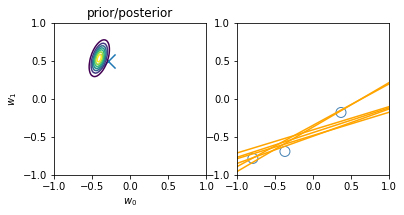

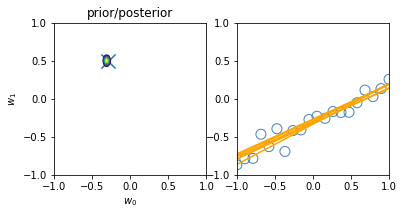

In [16]:
def linear(x):
    return -0.3 + 0.5 * x

x_train, y_train = create_toy_data(linear, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
print(w0.shape)
print(w1.shape)
w = np.array([w0, w1]).transpose(1, 2, 0)
print(w.shape)

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X = feature.transform(x)
model = BayesianRegressor(alpha=1., beta=100.)
for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    model.fit(X_train[begin:end], y_train[begin:end])
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean=model.w_mean, cov=model.w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    plt.subplot(1, 2, 2)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolors="steelblue", lw=1)
    plt.plot(x,model.predict(X,sample_size=6),c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

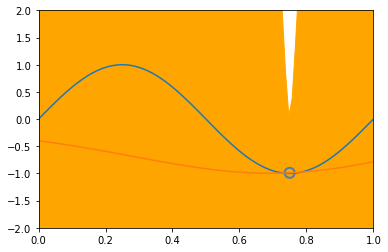

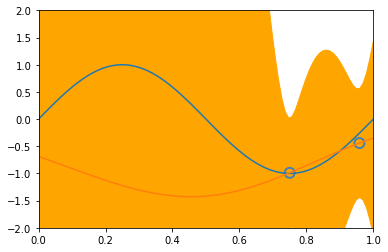

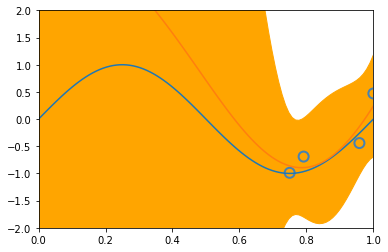

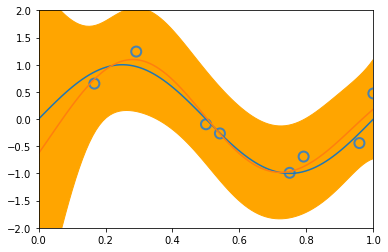

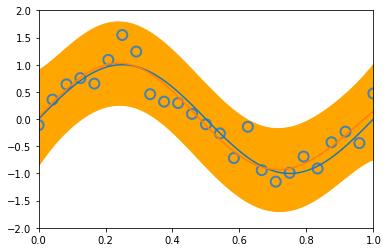

In [32]:
x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

feature = GaussianFeatures(np.linspace(0, 1, 9), 0.1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianRegressor(alpha=1e-3, beta=2)

for begin, end in [[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]:
    #plt.subplot(1,2,1)
    model.fit(X_train[begin:end], y_train[begin:end])
    y, y_std = model.predict(X_test, return_std=True)
    #plt.scatter(x_train[:end], y_train[:end], s=200, facecolor="none", edgecolors="b", lw=5)
    #plt.subplot(1,2,2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange")
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none",edgecolors="steelblue",lw=2)
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.show()


### The evidence approximation

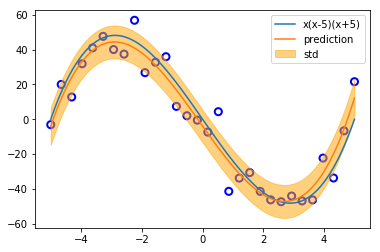

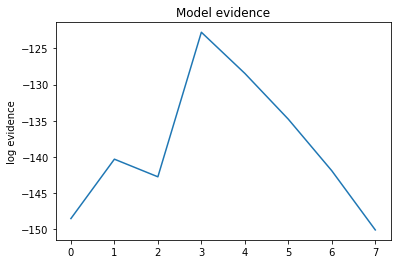

In [37]:
def cubic(x):
    return x * (x - 5) * (x + 5)

x_train, y_train = create_toy_data(cubic, 30, 10, [-5, 5])
x_test = np.linspace(-5, 5, 100)
evidences = []
models = []
for i in range(8):
    feature = PolynomialFeatures(degree=i)
    X_train = feature.transform(x_train)
    #X_test=feature.transform(x_test)
    model = EmpricalBayesRegressor(alpha=100., beta=100.)
    model.fit(X_train, y_train, max_iter=100)
    evidences.append(model.log_evidence(X_train, y_train))
    models.append(model)

degree = np.nanargmax(evidences)
regression = models[degree]

X_test = PolynomialFeatures(degree=int(degree)).transform(x_test)
y, y_std = regression.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, s=50, facecolor="none", edgecolors="b", lw=2)
plt.plot(x_test, cubic(x_test), label="x(x-5)(x+5)")
plt.plot(x_test, y, label="prediction")
plt.fill_between(x_test, y - y_std, y + y_std, alpha=0.5, label="std", color="orange")
plt.legend()
plt.show()

plt.plot(evidences)
plt.title("Model evidence")
plt.ylabel("degree")
plt.ylabel("log evidence")
plt.show()


In [39]:
a = np.array([ [[1, 2], [3, 4]], [[1, 2], [2, 1]], [[1, 3], [3, 1]] ])
print(a)
print(a.shape)

[[[1 2]
  [3 4]]

 [[1 2]
  [2 1]]

 [[1 3]
  [3 1]]]
(3, 2, 2)


In [41]:
a[0:2]

array([[[1, 2],
        [3, 4]],

       [[1, 2],
        [2, 1]]])

In [46]:
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100)
)
print(w0.shape)
print(w1.shape)
w = np.array([w0, w1]).transpose(1, 2, 0)

(100, 100)
(100, 100)


### 多维数组的transpose

In [48]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [49]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

transpose 的变换是根据 shape 进行的,对于三维数组难理解一点：假设 shape(z, x, y)

转换前 shape 是(0, 1, 2)
```
[[(0,0,0), (0,0,1), (0,0,2), (0,0,3)] ／／ [[[ 0, 1, 2, 3], 
[(0,1,0), (0,1,1), (0,1,2), (0,1,3)], ／／ [ 4, 5, 6, 7]], 
[(1,0,0), (1,0,1), (1,0,2), (1,0,3)] ／／ [[ 8, 9, 10, 11], 
[(1,1,0), (1,1,1), (1,1,2), (1,1,3)]]. ／／[12, 13, 14, 15]]]
```
转换后 shape 是(1, 0, 2), 也就是调换位于 z 轴 和 x 轴的shape
```
[[(0,0,0), (0,0,1), (0,0,2), (0,0,3)] 
(1,0,0), (1,0,1), (1,0,2), (1,0,3)], 
[(0,1,0), (0,1,1), (0,1,2), (0,1,3)] 
[(1,1,0), (1,1,1), (1,1,2), (1,1,3)]]
```
将转换前 shape 对应的值填进去 得到
```
[1,2,3,4]
[8,9,10,11]
[4,5,6,7]
[12,13,14,15]
```